<h3 style='color:orange'>Optimizer</h3>
<p>You may sometimes see the term optimizer or optimiztion function. This is simply the function that implements the backpropagation algorithm. Here's a list of a few common ones used.</p>
<ul>
<li>Gradient Descent</li>
<li>Stochastic Gradient Descent</li>
<li>Mini-Batch Gradient Descent</li>
<li>Momentum</li>
<li>Nesterov Accelerated Gradient</li>
</ul>
<p>This article explains them well.</p><a target='_blank' href='https://medium.com/@sdoshi579/optimizers-for-training-neral-network-59450d71caf6'>Here</a>

<h3 style='color:orange'>Creating a Neual Network</h3>
<a target='_blank' href='https://www.tensorflow.org/tutorials/keras/classification'>TensorFlow docs</a>

In [1]:
# Imports
import tensorflow as tf 
from tensorflow import keras 

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt 

<h3 style='color:orange'>Dataset</h3>
<p>Gor this tutorial we will use the MNIST Fashion Dataset. This is a dataset that is included in keras. This dataset includes 60,000 images for training and 10,0000 images for validation/testing.</p>

In [3]:
fashion_mnist = keras.datasets.fashion_mnist # load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # split into testing and training


In [4]:
train_images.shape

(60000, 28, 28)

<p>We have 60000 images that are made up of 28 X 28 pixels (784 in total)</p>

In [5]:
train_images[0,23,23] # lets have a look at one pixel

194

<p>The number of that pixel stands for the gray scale number. range of 256, 0 being black and 255 being white.</p>

In [6]:
train_labels[:10] # a look at the first 10 training labels.

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

<p>Our labels are integers ranging from 0-9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.</p>

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

<p>Let's look at what some of these images look like!</p>

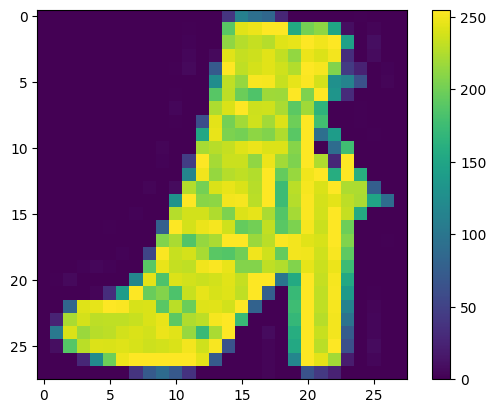

In [9]:
plt.figure()
plt.imshow(train_images[11])
plt.colorbar()
plt.grid(False)
plt.show()

<h3 style='color:orange'>Data Preprocessing</h3>
<p>The last step before creating our model is to preprocess our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all of our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.</p>

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0 

<h3 style='color:orange'>Building the Model</h3>
<p>Now it's time to build the model! We are going to use a keras sequential model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right). </p>

In [17]:
mattsModel = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # input layer (1)
    keras.layers.Dense(128, activation='relu'), # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

<p><b>Layer 1:</b> This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in that shape. The flatten means that our layer will reshape the shape (28, 28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.</p>
<p><b>Layer 2:</b> This is our first and only hidden layer. The dense denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.</p>
<p><b>Layer 3:</b> This is our output layer and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represents the probability of a given image being one of the 10 different classes. The activation function softmax is used on this layer to calculate a probability distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probability of the image being that class.</p>

<h3 style='color:orange'>Compile the Model</h3>
<p>The last step in building the model is to define the loss function, optimizer and metrics we would like to track.</p>

In [18]:
mattsModel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<h3 style='color:orange'>Training the Model</h3>


In [19]:
mattsModel.fit(train_images, train_labels, epochs=6) # We pass the data, labels and epochs and watch the magic!

Epoch 1/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4952 - accuracy: 0.8256
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3713 - accuracy: 0.8644
Epoch 3/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3350 - accuracy: 0.8776
Epoch 4/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3106 - accuracy: 0.8856
Epoch 5/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2920 - accuracy: 0.8921
Epoch 6/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2755 - accuracy: 0.8984


<h3 style='color:orange'>Evaluating the Model</h3>
<p>Now it's time to test/evaluate the model. We can do this quite easily using another builin method from keras.</p><p>The verbose argument is defined from the keras documentation as: 'verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar'.</p><a target='_blank' href='https://keras.io/models/sequential/'>keras.io/models/sequential</a>

In [20]:
test_loss, test_acc = mattsModel.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3383 - accuracy: 0.8792
Test accuracy: 0.8791999816894531


<p>You'll likely notice that the accuracy here is lower than when training the model. This difference is reffered to as <b>overfitting</b>. And now we have a trained model that's ready to use to predict some values! My original epochs was 10.</p>

<h3 style='color:orange'>Making Predictions</h3>
<p>To make predictions we simply need to pass an array of data in the form we've specified in the input layer to <b> predict()</b> method.</p>

In [21]:
predictions = mattsModel.predict(test_images)

313/313 [==============================] - 2s 1ms/step


<p>This method returns to us an array of predictions for each image we passed it. Let's have a look at the predictions for image 1.</p>

In [22]:
predictions[0]

array([1.8918061e-06, 1.0488686e-06, 9.3007327e-07, 5.6021896e-08,
       1.7247033e-06, 3.2218948e-02, 6.1879027e-06, 1.5017553e-02,
       2.7271759e-05, 9.5272440e-01], dtype=float32)

<p>If we wan't to get the value with the highest score we can use a useful function from numpy called <b><i>argmax()</i></b>. This simply returns the index of the maximium value from a numpy array.</p>

In [23]:
np.argmax(predictions[0])

9

<p>And we can check if this is correct by looking at the value of the cooresponding test label.</p>

In [31]:
test_labels[0]

9

313/313 [==============================] - 0s 1ms/step
Bag


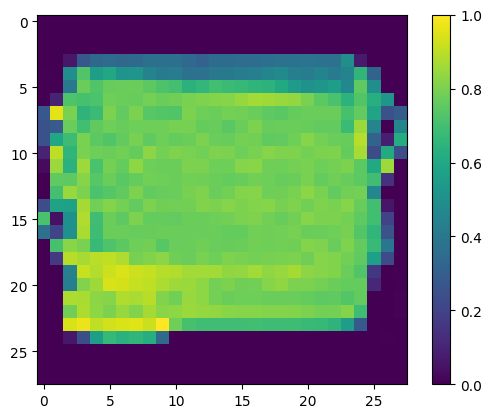

In [30]:
num = 134
predictions = mattsModel.predict(test_images)
print(class_names[np.argmax(predictions[num])])
plt.figure()
plt.imshow(test_images[num])
plt.colorbar()
plt.show()